# Contents

## 1. Importing libraries and data
## 2. Data preprocessing
## 3. The elbow technique
## 4. K-means clustering
## 5. Results and insights

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# Ensure the graphs are displayed in your notebook without the need to "call" them specifically
%matplotlib inline

In [3]:
path = '/Users/omid/Library/CloudStorage/OneDrive-Personal/Data Analytics/Data Analytics Immersion/Achievement 6/Soltani, Omid_2024-03_Open Project'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'clean_data.csv'))

In [5]:
df

,Unnamed: 0,rank,country_or_region,happiness_score,GDP_per_capita,social_support_score,life_expectancy,freedom_score,generosity_score,corruption_perception_score
0,0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...,...
151,151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


### 2. Data preprocessing

In [6]:
# Select only numeric columns
df_numeric = df.select_dtypes(exclude=['object'])

In [7]:
df_numeric

,Unnamed: 0,rank,happiness_score,GDP_per_capita,social_support_score,life_expectancy,freedom_score,generosity_score,corruption_perception_score
0,0,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,1,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,2,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,3,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,4,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,151,152,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,152,153,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,153,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,154,155,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [8]:
# Standardize data set through Z-score normalization

from sklearn.preprocessing import StandardScaler
scaler_zscore = StandardScaler()
df_scaled = scaler_zscore.fit_transform(df_numeric)

In [9]:
df_scaled

array([[-1.72098328, -1.72098328,  2.12871112, ...,  1.4242823 ,
        -0.33540398,  2.99675712],
       [-1.69877704, -1.69877704,  1.97639663, ...,  1.39627687,
         0.70726491,  3.17715844],
       [-1.67657081, -1.67657081,  1.93493825, ...,  1.47329179,
         0.90737308,  2.4449413 ],
       ...,
       [ 1.67657081,  1.67657081, -1.98648391, ..., -2.74852598,
        -0.28274393, -0.90840093],
       [ 1.69877704,  1.69877704, -2.09463621, ..., -1.17322084,
         0.52822076, -0.8022825 ],
       [ 1.72098328,  1.72098328, -2.30192812, ..., -2.67851242,
         0.18066446, -0.20801932]])

### 3. The elbow technique

In [10]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [11]:
score = [kmeans[i].fit(df_scaled).score(df_scaled) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

[-1404.0,
 -782.1076228078331,
 -577.7715506628679,
 -494.47368203060523,
 -434.8089656462493,
 -395.10825361272794,
 -364.37576475943325,
 -343.35809941067885,
 -325.50705973177594]

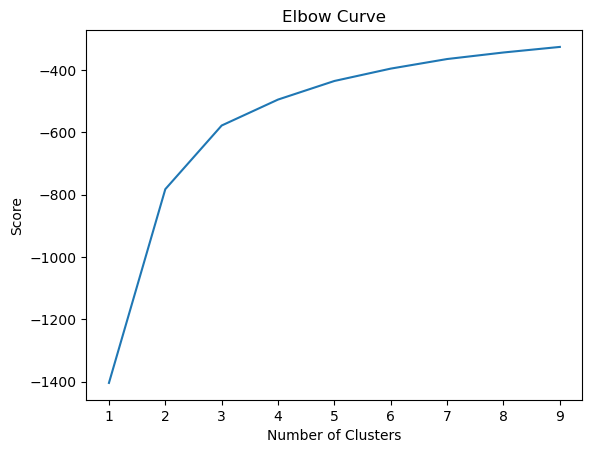

In [12]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### a significant leap is observed between 2 and 3 on the x-axis, followed by a plateauing of the curve. This suggests that the ideal number of clusters for the analysis is 3.

### 4. K-means clustering

In [13]:
# Create the k-means object
kmeans = KMeans(n_clusters = 3)

In [14]:
# Fit the k-means object to the data
kmeans.fit(df_scaled)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [15]:
df_numeric['clusters'] = kmeans.fit_predict(df_numeric)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
df_numeric.head()

,Unnamed: 0,rank,happiness_score,GDP_per_capita,social_support_score,life_expectancy,freedom_score,generosity_score,corruption_perception_score,clusters
0,0,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,1
1,1,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,1
2,2,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,1
3,3,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,1
4,4,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298,1


In [17]:
df_numeric.to_excel(os.path.join(path, '02 Data', 'Prepared Data', 'clusters.xlsx'), index=False)

In [17]:
df_numeric['clusters'].value_counts()

clusters
0    53
1    52
2    51
Name: count, dtype: int64

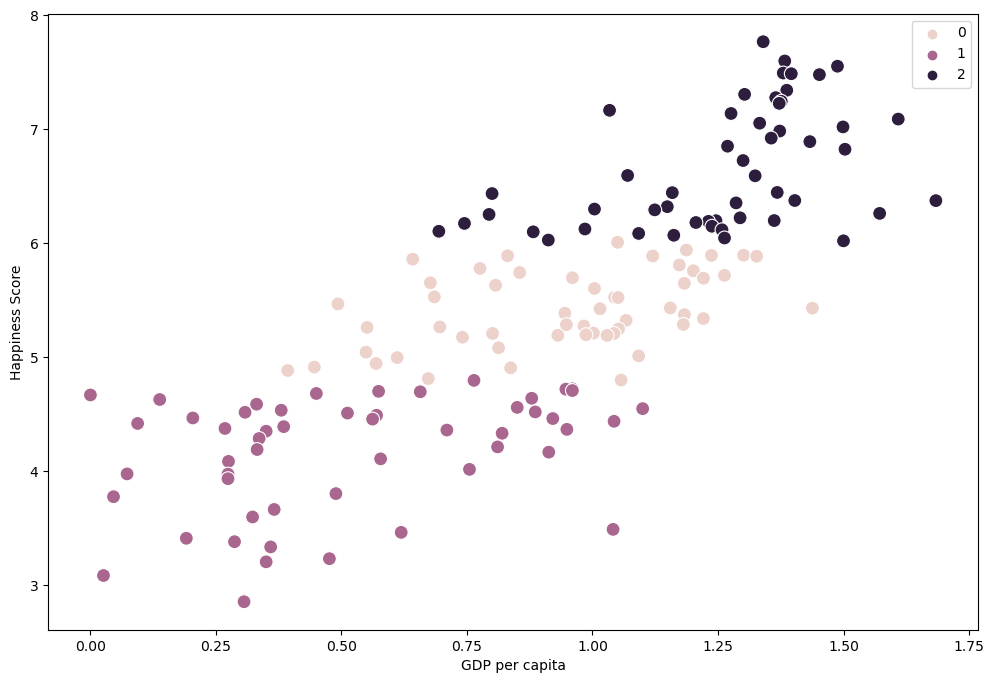

In [18]:
# Plot the clusters for the "happiness_score" and "GDP_per_capita" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numeric['GDP_per_capita'], y=df_numeric['happiness_score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('GDP per capita') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

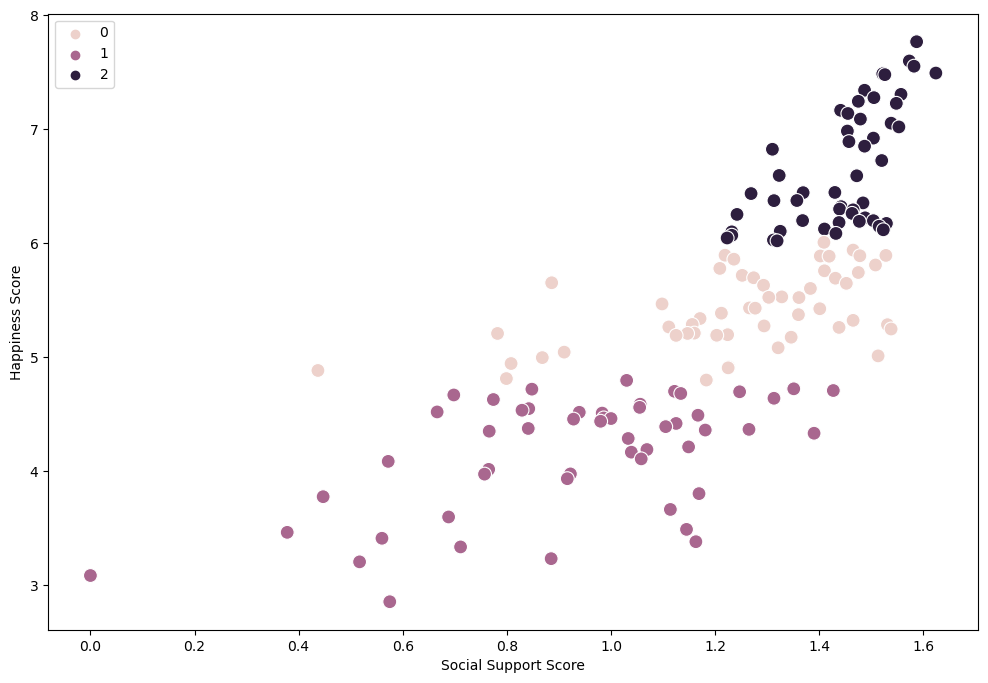

In [19]:
# Plot the clusters for the "hppiness_score" and "social_support_score" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numeric['social_support_score'], y=df_numeric['happiness_score'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Social Support Score') 
plt.ylabel('Happiness Score') 
plt.show()

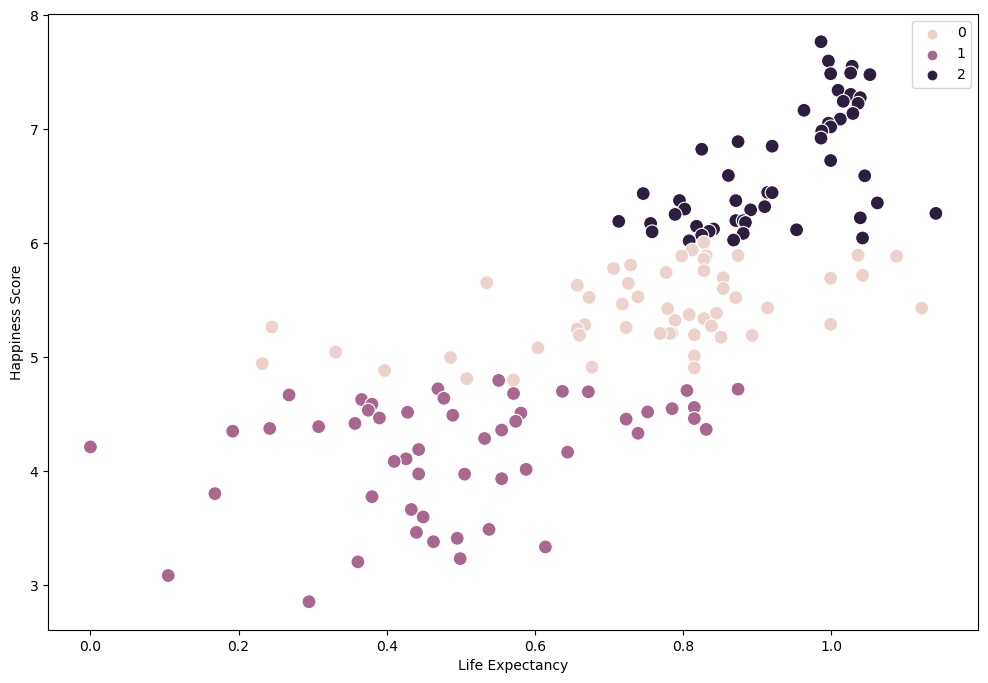

In [20]:
# Plot the clusters for the "hppiness_score" and "life_expectancy" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numeric['life_expectancy'], y=df_numeric['happiness_score'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Life Expectancy') 
plt.ylabel('Happiness Score') 
plt.show()

In [21]:
df_numeric.loc[df_numeric['clusters'] == 2, 'cluster'] = 'dark purple'
df_numeric.loc[df_numeric['clusters'] == 1, 'cluster'] = 'purple'
df_numeric.loc[df_numeric['clusters'] == 0, 'cluster'] = 'pink'

In [22]:
df_numeric.groupby('cluster').agg({'GDP_per_capita':['mean', 'median'], 
                         'social_support_score':['mean', 'median'], 
                         'life_expectancy':['mean', 'median'],
                          'happiness_score':['mean', 'median']})

GDP_per_capita        social_support_score          \
                      mean median                 mean  median   
cluster                                                          
dark purple       1.255569  1.300             1.442725  1.4650   
pink              0.945226  1.002             1.251245  1.2770   
purple            0.520615  0.463             0.936154  0.9845   

            life_expectancy        happiness_score         
                       mean median            mean median  
cluster                                                    
dark purple        0.927902  0.920        6.657294  6.444  
pink               0.754868  0.789        5.417642  5.386  
purple             0.496288  0.483        4.170192  4.363

### 5. Results and insights

#### The clusters seem to exhibit distinct characteristics based on the mean and median values of various features.

1. **Dark Purple Cluster:**
   - This cluster has relatively lower GDP per capita, social support score, and life expectancy compared to the other clusters.
   - The happiness score is also lower, indicating that countries in this cluster tend to have lower overall well-being.
   - These characteristics suggest that countries in this cluster might be experiencing economic challenges, lower social cohesion, and potentially poorer health outcomes.

2. **Pink Cluster:**
   - The GDP per capita, social support score, and life expectancy in this cluster are notably higher compared to the dark purple cluster.
   - The happiness score is significantly higher as well, indicating that countries in this cluster tend to have higher overall well-being.
   - These features suggest that countries in this cluster are likely to be more affluent, with stronger social support systems and better health outcomes, contributing to higher levels of happiness.

3. **Purple Cluster:**
   - This cluster falls between the dark purple and pink clusters in terms of GDP per capita, social support score, and life expectancy.
   - The happiness score also falls in between, suggesting moderate levels of overall well-being for countries in this cluster.
   - These characteristics indicate that countries in this cluster may have a mix of economic, social, and health indicators, resulting in a moderate level of happiness.

Overall, the clusters seem to align with expectations based on the features analyzed. However, further exploration and validation may be necessary to ensure the robustness of the clustering results.

#### These clustered results can be highly beneficial for various aspects of an analytics pipeline:

1. **Policy Decision Making:**
   - Government policymakers can use these clusters to tailor policies and interventions according to the specific needs and characteristics of countries within each cluster. For example, countries in the "Dark Purple" cluster may require targeted economic assistance programs, while those in the "Pink" cluster may benefit from initiatives to further enhance social support systems.

2. **Resource Allocation:**
   - International organizations and aid agencies can prioritize resource allocation based on the clusters' identified needs. For instance, funding and assistance programs can be directed towards countries in clusters with lower well-being indicators to address socio-economic disparities and improve overall quality of life.

3. **Targeted Interventions:**
   - NGOs and humanitarian organizations can design targeted interventions aimed at addressing specific challenges prevalent in each cluster. For example, health-focused initiatives such as vaccination campaigns or healthcare infrastructure development may be more relevant for countries in clusters with lower life expectancy.

4. **Benchmarking and Monitoring Progress:**
   - These clusters can serve as benchmarks for monitoring progress over time. By periodically assessing changes in cluster membership and characteristics, stakeholders can track the effectiveness of interventions and policies implemented to improve well-being and socio-economic conditions.

5. **Research and Further Analysis:**
   - Researchers can use these clusters as a basis for further investigation into the underlying factors contributing to differences in well-being among countries. By conducting in-depth analyses within and across clusters, researchers can uncover insights that may inform future policies and interventions.

Overall, these clustered results provide valuable insights that can guide decision-making processes, resource allocation strategies, and targeted interventions aimed at improving the well-being of populations across different regions of the world.